In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator


# Lista de alumnos del curso de análisis y diseño de algoritmos

In [2]:
data = pd.read_csv('./alumnos.csv',delimiter=';')
palabras = []
for apellidos in data['apellidos']:
    palabras.extend(apellidos.split(' '))
texto = ' '.join(palabras)
texto

'SANTIAGO CONDORI QUISPE CONDORI TICONA MAQUERA LOPEZ YUCRA MENDOZA APAZA RODRIGUEZ ALCOS PURACA CALAPUJA PORTUGAL CHIPANA MAMANI CARTAGENA QUISPE CCALLO POLLOQUERI CHACHAQUE ARIAS ESCARCENA CHAMBILLA VILCA CHAMBI ALFEREZ CONTRERAS CHUQUITARQUI AYALA POLLOYQUERI CRUZ OLVEA CAMPOS MAMANI TOHALA VELASCO QUILLE ALEMAN CATARI CCUNO LAURACIO QUISPE MAMANI TICONA DUEÑAS RAMOS TICONA VELASQUEZ MONRROY HUAYTA MULLISACA JAEN MAMANI MAMANI ROJAS ALMONTE PACCOSONCCO CHURA'

In [25]:
data

,apellidos,nombres
0,SANTIAGO CONDORI,CLEOFE
1,QUISPE CONDORI,JOSE CARLOS
2,TICONA MAQUERA,DAVID HENRRY
3,LOPEZ YUCRA,LENIN
4,MENDOZA APAZA,FIORELLA YANEL
5,RODRIGUEZ ALCOS,PAUL
6,PURACA CALAPUJA,CARLOS VIRGILIO
7,PORTUGAL CHIPANA,ANTHONY JHONATAN
8,MAMANI CARTAGENA,ELIANA YEMIRA
9,QUISPE CCALLO,NURY MIRIAN


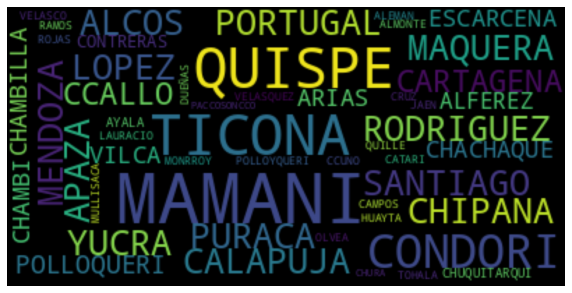

In [3]:
wc = WordCloud(max_font_size=50,background_color='black').generate(texto)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='gaussian')

plt.axis('off')
plt.show()

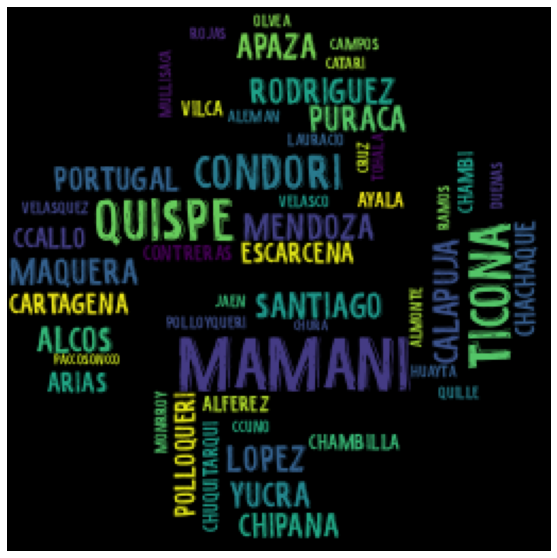

In [23]:
ada_color = np.array(Image.open('./python.png'))
ada_color = ada_color[::3, ::3]
ada_mask = ada_color.copy()
ada_mask[ada_mask.sum(axis=2) == 0] = 255
edges = np.mean([gaussian_gradient_magnitude(ada_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
ada_mask[edges > .08] = 255
wc = WordCloud(font_path='Hello Jones Free Trial.otf',mask=ada_mask, max_font_size=30)
wc.generate(texto)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wc)

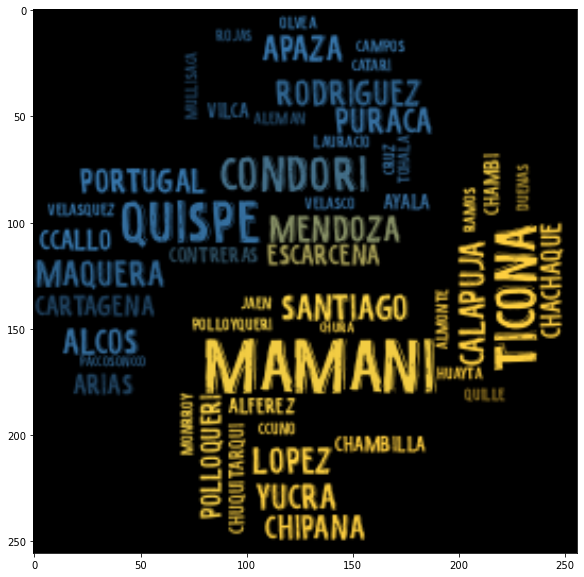

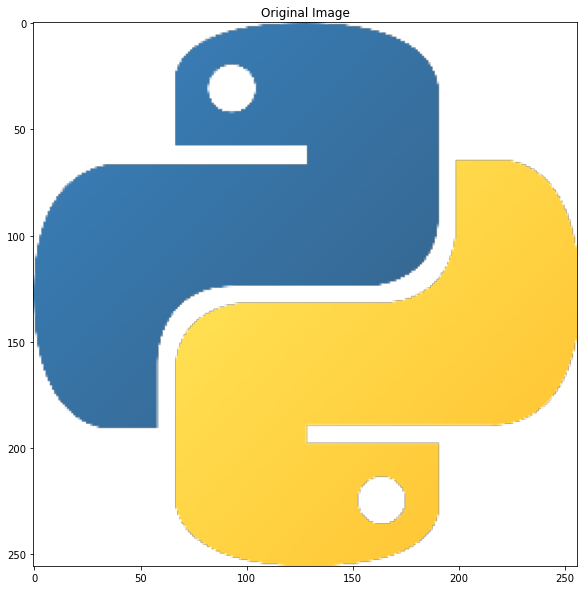

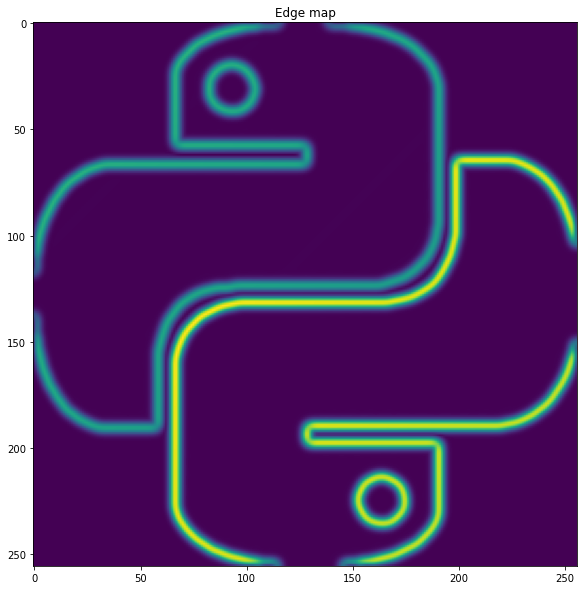

In [24]:
image_colors = ImageColorGenerator(ada_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("ada_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(ada_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()